In [4]:
import json
import sys
import datetime
import networkx as nx
#import bson
import re
import pandas as pd
import numpy as np


In [5]:
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv('sandy_kw_sample200k.csv')

In [7]:
df=df[['Username','Mentions']]

In [8]:
df[0:2]

,Username,Mentions
0,BiasedGirl,"GovChristie,"
1,TheFoxyBoxy,NaN


In [9]:
df1 = df.replace(np.nan, '', regex=True)

In [10]:
df1[0:2]

,Username,Mentions
0,BiasedGirl,"GovChristie,"
1,TheFoxyBoxy,


In [11]:
len(df1.index)
df1=df1

In [12]:
for index,row in df1.iterrows():
    a=row['Mentions']
    words = a.split(",") 
    outd=words[:-1]
    #row['Mentions_list']= words[:-1]
    #row['Out-Degree']=0
    df1.set_value(index,'Mentions_list',words[:-1])
    

In [13]:
df1=df1[['Username','Mentions_list']]

In [14]:
df1[0:1]

,Username,Mentions_list
0,BiasedGirl,[GovChristie]


In [15]:
names=df1['Username'].tolist()

In [16]:
def add_node(g, twt_user):
	n = twt_user
	if not g.has_node(n):
		g.add_node(n)
		g.node[n]['weight'] = 1
		g.node[n]['screen_name'] = twt_user
	else:
		g.node[n]['weight'] += 1

	return g

In [17]:
def add_edge(g, n1, n2, e_type):

	if not g.has_edge(n1,n2):
		g.add_edge(n1,n2)
		g[n1][n2]['weight'] = 1
		#g[n1.id][n2.id]['type'] = e_type
	else:
		g[n1][n2]['weight'] += 1

	return g

In [1]:
# for each in twts:
#		usr = Twt_user(each)
#		g = add_node(g, usr)
#           for mention in usr.get_user_mentions():
# 			m_usr = Mention_user(mention)
# 			g = add_node(g, m_usr)
# 			g = add_edge(g, usr, m_usr, 'mention')
# 		count +=1

In [18]:
g = nx.DiGraph()
count=0
for index,row in df1.iterrows():
    usr=row['Username']
    g=add_node(g,usr)
    men=row['Mentions_list']
    for mention in men:
        g=add_node(g,mention)
        g=add_edge(g,usr,mention,'mention')
    count=count+1

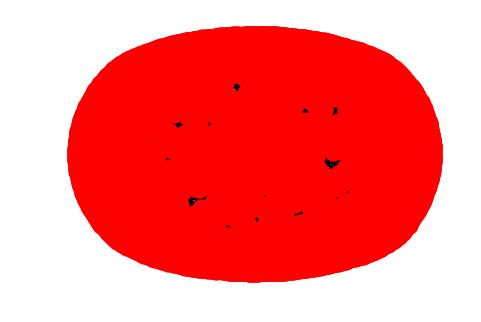

In [18]:
nx.draw(g)
plt.show()

In [19]:
g

In [20]:
plt.figure(figsize=(18,18))            
nx.draw_circular(g,node_color='g', edge_color='#909090', node_size=900)
plt.axis('equal')

(-1.2099999871324494,
 1.2099998682404223,
 -1.2099999873028739,
 1.2099998680699979)

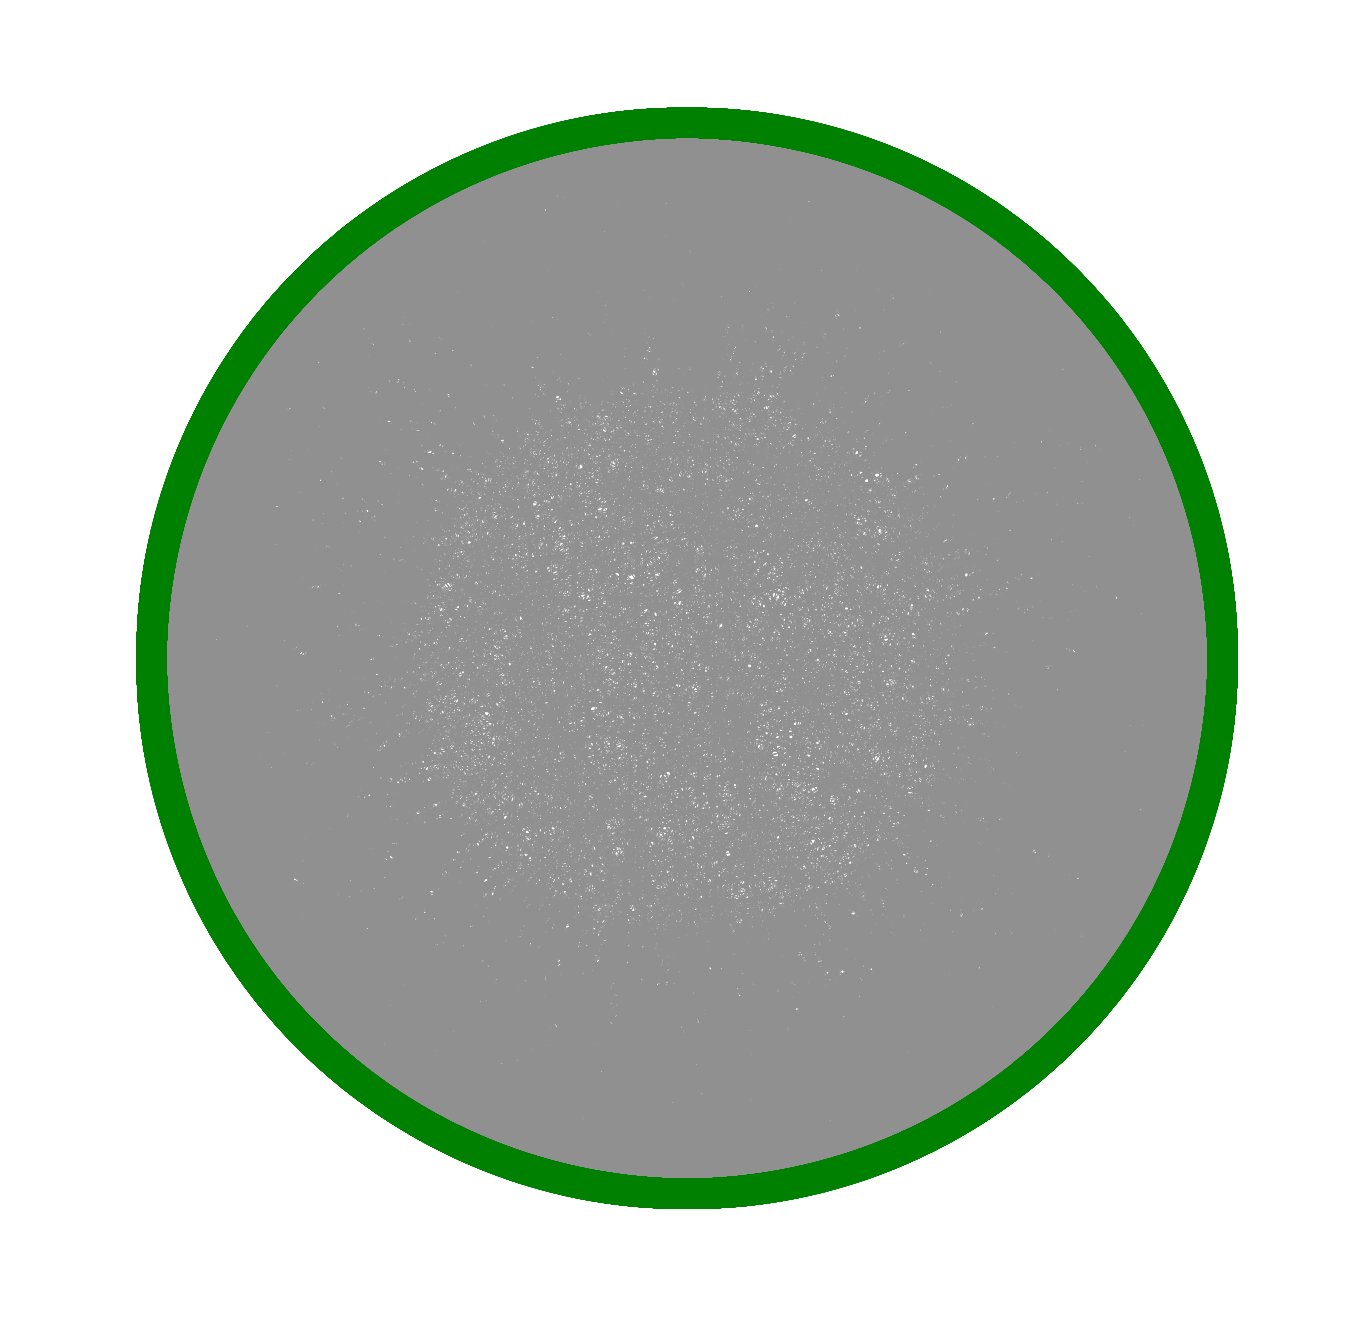

In [21]:
plt.show()

In [22]:
print len(g)


13196


In [23]:
# removing singleton pairs
for each in g.edges():
    if g.degree(each[0]) == g.degree(each[1]) == 1:
        g.remove_node(each[0])

In [24]:
g1=g

In [25]:
#remove single nodes
remove_list=[]
for each in g.nodes():
    if (g.degree(each)==0):
        remove_list.append(each)

In [26]:
for i in remove_list:
    g.remove_node(i)

In [27]:
plt.figure(figsize=(18,18))            
nx.draw_circular(g,node_color='g', edge_color='#909090', node_size=900)
plt.axis('equal')

(-1.2099999992341841,
 1.2099999998965432,
 -1.2099999992061599,
 1.2099999999245674)

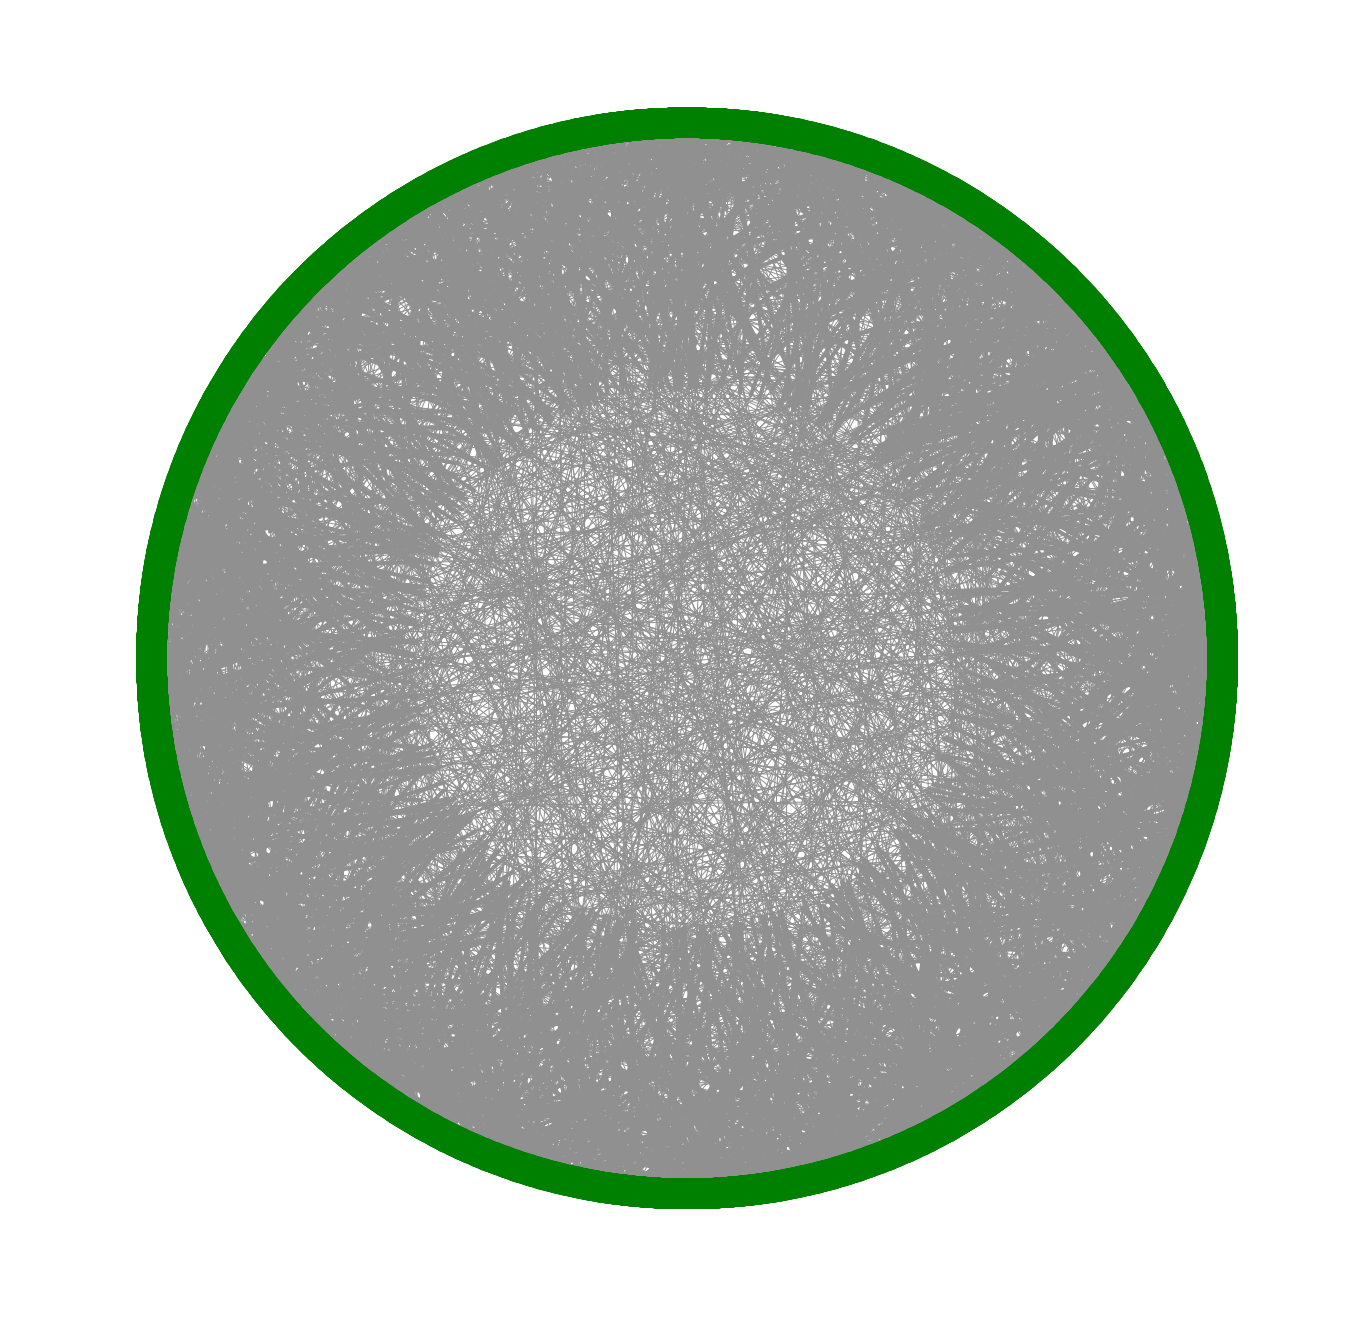

In [28]:
plt.show()

In [19]:
nx.write_graphml(g, 'Key200k.graphml')